# New York City Airbnb -- Hosts
 **Industry** : Housing<br>
 **Description**: Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world.  <br>

### Group 2 Members

* Nikhil Shankar  
* Jun He (Helena) 
* George 

### Research: **As an Airbnb host, how to optimize price?**

### Dataset Description

This dataset contains 48,895 entries, 16 columns. It includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.<br/>
**Key Attributes:**

* Listing Details: id, name
* Host Information: host_id, host_name, calculated_host_listings_count
* Location: neighbourhood_group (borough), neighbourhood, latitude, longitude
* Property Details: room_type (entire home, private room, etc.), price, minimum_nights
* Engagement Metrics: number_of_reviews, reviews_per_month, last_review
* Availability: availability_365 (days available in a year)


## Exploratory Data Analysis (EDA)
### Data Cleaning and Preparation

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [21]:
# Step 1: Data Loading
def load_data(file_path):
    """Load dataset from file_path."""
    data = pd.read_csv(file_path)
    return data

In [22]:
# Load the dataset
data = load_data('AB_NYC_2019.csv')
print("Initial Data Overview:\n", data.head(5))

Initial Data Overview:
      id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               

In [23]:
# Step 2: Data Cleaning
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [24]:
## Statistic
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Data Visualization 

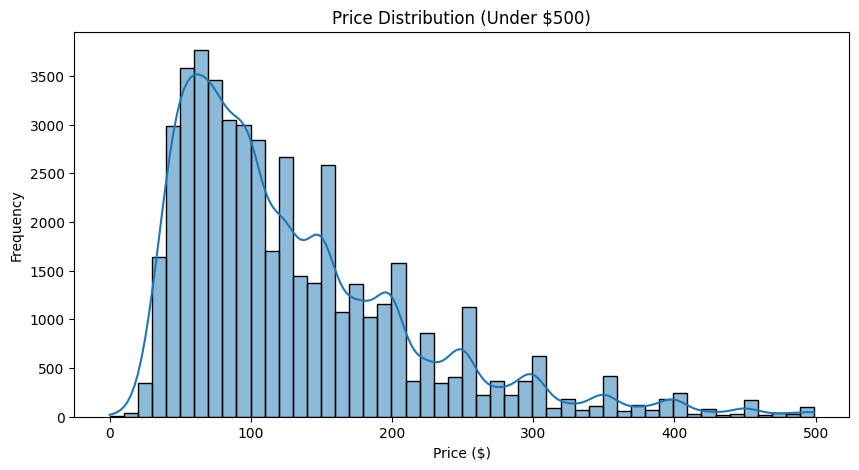

In [25]:
# Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data[data['price'] < 500]['price'], bins=50, kde=True)
plt.title("Price Distribution (Under $500)")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

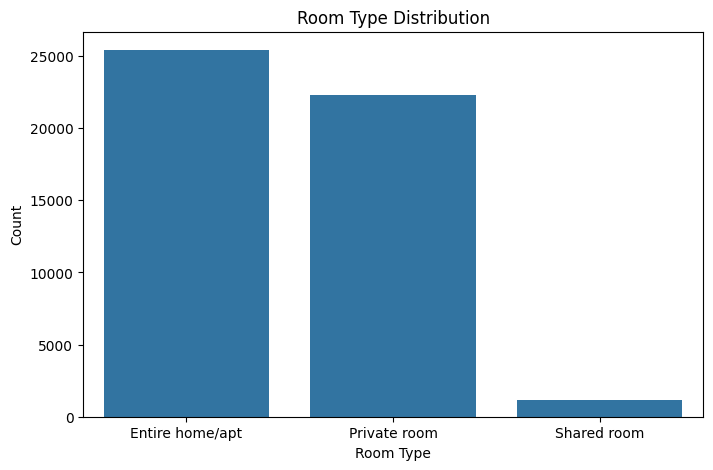

In [26]:
# Room type distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=data, order=data['room_type'].value_counts().index)
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

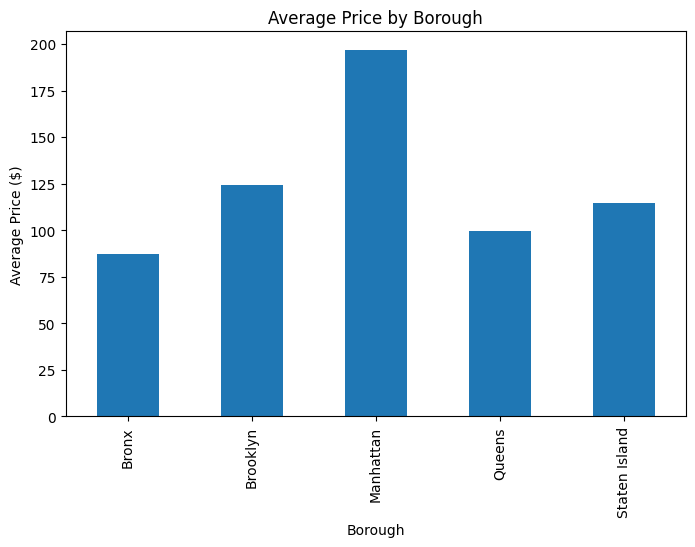

In [27]:
# Average price by borough
plt.figure(figsize=(8, 5))
data.groupby("neighbourhood_group")['price'].mean().plot(kind='bar')
plt.title("Average Price by Borough")
plt.xlabel("Borough")
plt.ylabel("Average Price ($)")
plt.show()

### Identifying Top Hosts ###

In [28]:

# Top Hosts by number of listings
top_hosts = data.groupby(['host_id', 'host_name'])['calculated_host_listings_count'].max().sort_values(ascending=False).head(10)
print("\nTop Hosts by Listings:")
print(top_hosts)


Top Hosts by Listings:
host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 121
137358866  Kazuya               103
16098958   Jeremy & Laura        96
12243051   Sonder                96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
1475015    Mike                  52
Name: calculated_host_listings_count, dtype: int64


### Neighborhood-Specific Pricing Strategy
low_price_threshold = data["price"].quantile(0.33)
high_price_threshold = data["price"].quantile(0.66)
neighborhood_price_trends = data.groupby("neighbourhood")["price"].mean()
neighborhood_price_trends = neighborhood_price_trends.to_frame()
neighborhood_price_trends["category"] = "Mid-range"
neighborhood_price_trends.loc[neighborhood_price_trends["price"] <= low_price_threshold, "category"] = "Budget"
neighborhood_price_trends.loc[neighborhood_price_trends["price"] >= high_price_threshold, "category"] = "Luxury"
print("\nNeighborhood Pricing Strategy:")
print(neighborhood_price_trends.head(10))

### Price Prediction Model ###

In [29]:
# Selecting features
features = ["latitude", "longitude", "availability_365", "number_of_reviews", "calculated_host_listings_count"]
X = data[features]
y = data["price"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [30]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:\nMAE: {mae:.2f}\nR^2 Score: {r2:.2f}")


Model Performance:
MAE: 84.27
R^2 Score: 0.04


### Seasonal Trends ###

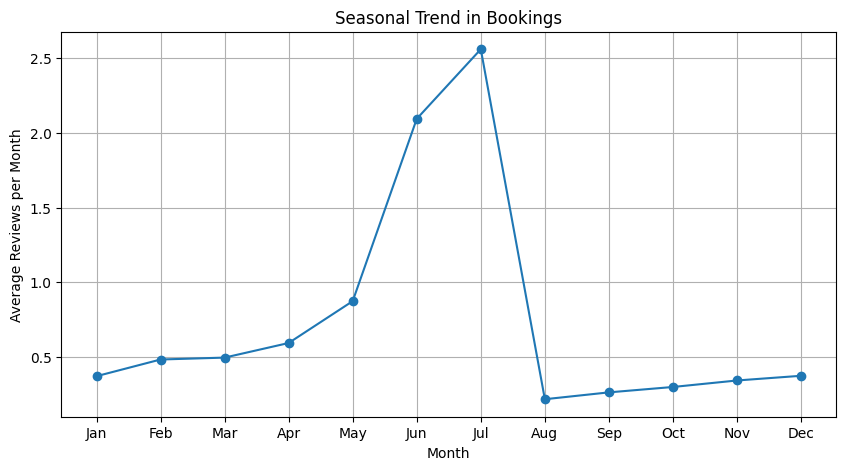

In [31]:
data["last_review"] = pd.to_datetime(data["last_review"], errors="coerce")
data["month"] = data["last_review"].dt.month
seasonal_reviews = data.groupby("month")["reviews_per_month"].mean()
plt.figure(figsize=(10, 5))
plt.plot(seasonal_reviews.index, seasonal_reviews.values, marker="o", linestyle="-")
plt.xlabel("Month")
plt.ylabel("Average Reviews per Month")
plt.title("Seasonal Trend in Bookings")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()

### Summary & Recommendations ###

print("\nSummary:")
print("- Budget-friendly areas see higher guest activity.")
print("- Listings priced below $150 get more reviews and are booked more often.")
print("- July is the peak season; prices should be increased.")
print("- August sees lower demand; consider discounts.")
print("- The predictive model helps hosts price their properties based on key factors.")
